<a href="https://colab.research.google.com/github/denizgulal/Image_Classifier_with_Neural_Networks/blob/main/feature_extraction_bart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
path ='/content/drive/MyDrive/Computer Vision Masterclass/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [46]:
directory = '/content/homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [47]:
export = 'mouth,pants,shoes,tshirt,shorts,sneakers,class\n'

In [48]:
show_images = False
features = []

In [49]:
for image_path in files:
  try:
    original_image = cv2.imread(image_path)
    (H, W) = original_image.shape[:2]
  except:
    continue

  image = original_image.copy()
  image_features = []
  mouth = pants = shoes = 0  #homer's feautures
  tshirt = shorts = sneakers = 0  #bart's features

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

In [50]:
for image_path in files:
  #print(image_path)
  try:
    original_image = cv2.imread(image_path)
    (H, W) = original_image.shape[:2]
  except:
    continue

  image = original_image.copy()
  image_features = []
  mouth = pants = shoes = 0
  tshirt = shorts = sneakers = 0

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  for height in range(0, H):
    for width in range(0, W):
      blue = image.item(height, width, 0)
      green = image.item(height, width, 1)
      red = image.item(height, width, 2)

      # Homer - brown mouth
      if (blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >= 175 and red <= 200):
        image[height, width] = [0, 255, 255]
        mouth += 1

      # Homer - blue pants
      if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
        image[height, width] = [0, 255, 255]
        pants += 1

      # Homer - gray shoes
      if height > (H / 2):
        if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
          image[height, width] = [0, 255, 255]
          shoes += 1

      # Bart - orange t-shirt
      if (blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
        image[height, width] = [0, 255, 128]
        tshirt += 1

      # Bart - blue shorts
      if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
        image[height, width] = [0, 255, 128]
        shorts += 1

      # Bart - blue sneakers
      if height > (H / 2):
        if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
          image[height, width] = [0, 255, 128]
          sneakers += 1

  mouth = round((mouth / (H * W)) * 100, 9)
  pants = round((pants / (H * W)) * 100, 9)
  shoes = round((shoes / (H * W)) * 100, 9)

  tshirt = round((tshirt / (H * W)) * 100, 9)
  shorts = round((shorts / (H * W)) * 100, 9)
  sneakers = round((sneakers / (H * W)) * 100, 9)

  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(tshirt)
  image_features.append(shorts)
  image_features.append(sneakers)
  image_features.append(class_name)

  features.append(image_features)

  #print('Homer mouth: %s - Homer pants: %s - Homer shoes: %s' % (image_features[0], image_features[1], image_features[2]))
  #print('Bart t-shirt: %s - Bart shorts: %s - Bart sneakers: %s' % (image_features[3], image_features[4], image_features[5]))

  f = (",".join([str(item) for item in image_features]))
  export += f + '\n'

  if show_images == True:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    fig, im = plt.subplots(1, 2)
    im[0].axis('off')
    im[0].imshow(original_image)
    im[1].axis('off')
    im[1].imshow(image)
    plt.show()

In [51]:
export

'mouth,pants,shoes,tshirt,shorts,sneakers,class\n0.0,0.0,0.114799225,6.886101887,3.495204355,3.495204355,0\n0.0,0.0,0.11007847,5.004901113,3.183888705,3.183888705,0\n0.0,0.0,0.182518631,5.264620437,5.029682961,5.029682961,0\n0.0,0.480168257,0.080028043,0.0,0.0,0.0,0\n0.0,0.0,0.029707562,8.978929368,3.459119497,3.459119497,0\n0.0,0.0,0.053304904,6.75432362,0.948827292,0.948827292,0\n0.249585206,0.0,0.019853369,9.693407263,4.104683977,4.104683977,0\n0.0,0.0,0.181208054,0.0,0.0,0.0,0\n0.0,0.0,0.148868778,0.0,0.0,0.0,0\n0.0,0.0,0.114762211,9.594752524,7.522715548,7.522715548,0\n0.0,0.0,0.138655462,0.0,0.0,0.0,0\n0.0,0.0,0.02400947,19.545383481,0.0,0.0,0\n0.00307645,0.0,0.0,6.495154592,5.599138594,5.599138594,0\n0.001317263,0.0,0.087817515,0.0,0.0,0.0,0\n0.0,0.0,0.032184591,8.395721925,0.0,0.0,0\n0.02105732,0.0,0.008503918,8.915750471,0.0,0.0,0\n0.0,0.0,0.081055114,11.095816228,4.525111363,4.525111363,0\n0.0,0.0,0.08757526,10.443349754,3.183296307,3.183296307,0\n0.0,0.0,0.043806812,9.497408

In [52]:
with open('features.csv', 'w') as file:
  for l in export:
    file.write(l)
file.closed

True

In [53]:
dataset = pd.read_csv('features.csv')

Create Train and Test Sets

In [54]:
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Train the NN

In [56]:
network2 = tf.keras.models.Sequential()
network2.add(tf.keras.layers.Dense(input_shape = (6,), units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [57]:
network2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [58]:
network2.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [59]:
history = network2.fit(X_train, y_train, epochs = 50)

Epoch 1/50
7/7 [==============================] - 2s 6ms/step - loss: 0.7502 - accuracy: 0.5442
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7332 - accuracy: 0.5721
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7186 - accuracy: 0.6000
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7039 - accuracy: 0.6000
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.6047
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.6047
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6685 - accuracy: 0.6140
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6590 - accuracy: 0.6279
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6498 - accuracy: 0.6419
Epoch 10/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6414 - accuracy: 0.6465
Epoch 11/50
7/7 [======================

Evaluation

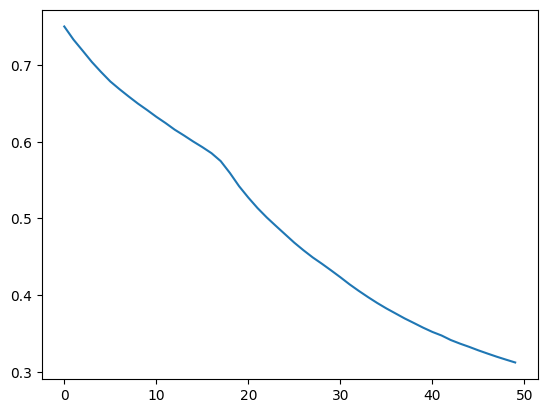

In [60]:
plt.plot(history.history['loss']);

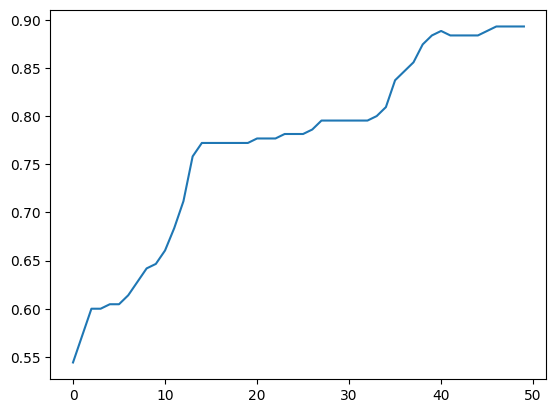

In [61]:
plt.plot(history.history['accuracy']);

In [62]:
predictions = network2.predict(X_test)
predictions = (predictions > 0.5)

2/2 [==============================] - 0s 7ms/step


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9074074074074074

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

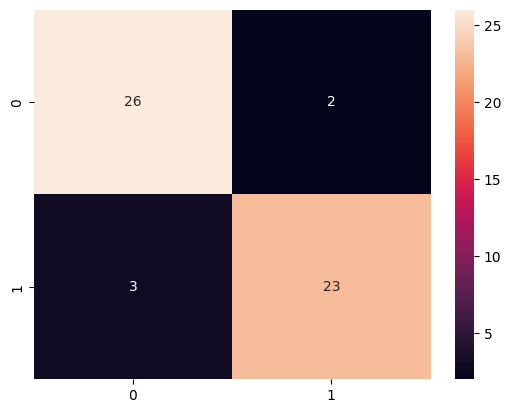

In [65]:
sns.heatmap(cm, annot=True);

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.92      0.88      0.90        26

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



Save Your Work

In [67]:
model_json = network2.to_json()
with open('network2.json','w') as json_file:
  json_file.write(model_json)

In [68]:
from keras.models import save_model
network2_saved = save_model(network2, '/content/weights2.hdf5')

In [69]:
with open('network2.json', 'r') as json_file:
  json_saved_model = json_file.read()

In [70]:
network2_loaded = tf.keras.models.model_from_json(json_saved_model)
network2_loaded.load_weights('weights2.hdf5')
network2_loaded.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [71]:
network2_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [72]:
test_image = X_test[0]
test_image = test_image.reshape(1,-1)
network2_loaded.predict(test_image)[0][0]
if network2_loaded.predict(test_image)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 28ms/step
Bart
